In [1]:
# analyze raw pose estimation from vertical videos only and get gait metrics

# required folder structure of input folder (raw_pose_data_in_path, mirrors video folder structure)
# raw_pose_data_in_path
    # participant 1
        # date 
            # 000_raw_pose_data (folder containing pose, world, and yolo raw pose data .csv files) 
    # BW-12 
        # 2024-05-02  
            # 000_raw_pose_data (folder containing pose, world, and yolo raw pose data .csv files)

#  outputs from this analysis per patient will be saved in the same folder 

#raw_pose_data_in_path
    # participant 1
        # date 
            # 001 analysis results 
            # 002 analysis results 

# .csv for all participants in raw_pose_data_in_path saved as all_participants_pose_metrics_df variable 
    # save pose metrics from all videos in raw_pose_data_in_path saved as  
    # 'all_participants_pose_metrics_df.csv' in raw_pose_data_in_path folder 

# note! if more than three videos for each task, need to update 'task' variable below to include 'gait_vertical_left_3' etc 

# try for no spaces in folder and file names, but should still work if there are spaces 

In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import os 
import re

In [3]:
# import functions from sandbox src code files 
from raw_pose_analysis_funs.merge_mp_yolo_dfs import (merge_mp_pose_world, clean_mp_yolo_missing_data, add_orientation_and_turn_direction, save_merge_mp_yolo_df)
from raw_pose_analysis_funs.frames_to_time import (add_time_column, save_df_w_time)
from raw_pose_analysis_funs.landmark_visibility import (mp_vis_all_labels_boxplot, mp_vis_lineplot, mp_save_vis_stats_by_label, yolo_vis_lineplot)
from raw_pose_analysis_funs.select_linear_walking import select_plot_linear_walking
from raw_pose_analysis_funs.segment_video_walk_turn import (segment_video_interp_filter, segment_video_walks_turn)
from raw_pose_analysis_funs.gait_metric_stride_time import(stride_time_interp, calculate_stride_time)
from raw_pose_analysis_funs.gait_metric_cadence import (calculate_cadence)
from raw_pose_analysis_funs.gait_metric_stride_width import (stride_width_interp, calculate_stride_width)
from raw_pose_analysis_funs.gait_metric_support import (support_interp, ankle_y_vel_accel_peak_min, 
id_toe_off_heel_strike, calculate_single_double_support, create_blank_df_for_no_support)
from raw_pose_analysis_funs.gait_metrics_compile_stats import save_all_pose_metrics

In [4]:
# set variables manually  

# Set input path to run all analysis 
# folder with all raw pose data (dir_in_path) 
raw_pose_data_in_path = r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_hc_outputs'

# input variables for interpolation and filtering 
max_gap = 0.12 # max gap to interpolate over 
cutoff = 0.4
order = 1

In [5]:
# save list of all csv files in raw pose data folders 

raw_data_full_path_all = [] 
raw_data_file_names_all = []

# loop through all files in input path 
for (dir_path, dir_names, file_names) in os.walk(raw_pose_data_in_path):
    for file_name in file_names: 
        name, ext = os.path.splitext(file_name)
        ext = ext.lower()[1:]
        current_raw_data_in_path = os.path.join(dir_path, file_name) # full path to files 
        # save full path to file if it meets requirements to be raw pose data 
        if (ext == 'csv') & ('000_raw_pose_data' in current_raw_data_in_path): # from run.py, outputs all saved in 000_raw_pose_data_folder
            raw_data_full_path_all = raw_data_full_path_all + [current_raw_data_in_path]
            raw_data_file_names_all = raw_data_file_names_all + [file_names]

In [6]:
# find all unique ID date combos (each unique folder with videos)
id_date_all = []
for file_i, raw_path in enumerate(raw_data_full_path_all): 
    parent_path_1, current_file_name = os.path.split(raw_path)
    parent_path_2, current_raw_data_folder = os.path.split(parent_path_1)
    parent_path_3, current_date = os.path.split(parent_path_2)
    parent_path_4, current_id = os.path.split(parent_path_3)
    current_id_date = os.path.join(current_id, current_date)
    id_date_all = id_date_all + [current_id_date]

# add if statement to pick specific IDs
#if float(current_id[3:]) >= 288:
       # current_id_date = os.path.join(current_id, current_date)
      #  id_date_all = id_date_all + [current_id_date]

Analyzing data from: DS_HC\2024-05-02
dir_out_prefix: C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_hc_outputs\DS_HC\2024-05-02
Analyzing video_id_date_name: gait_vertical_left_DS_HC_2024-05-02


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


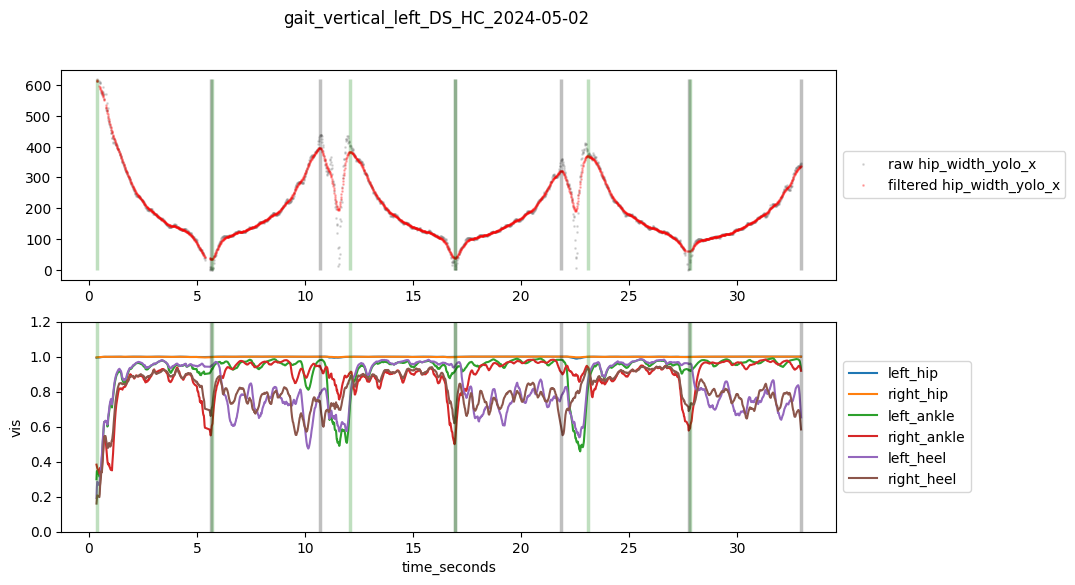

Skipped: no files matching gait_vertical_left_2
Skipped: no files matching gait_vertical_left_3
Analyzing video_id_date_name: gait_vertical_right_DS_HC_2024-05-02


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


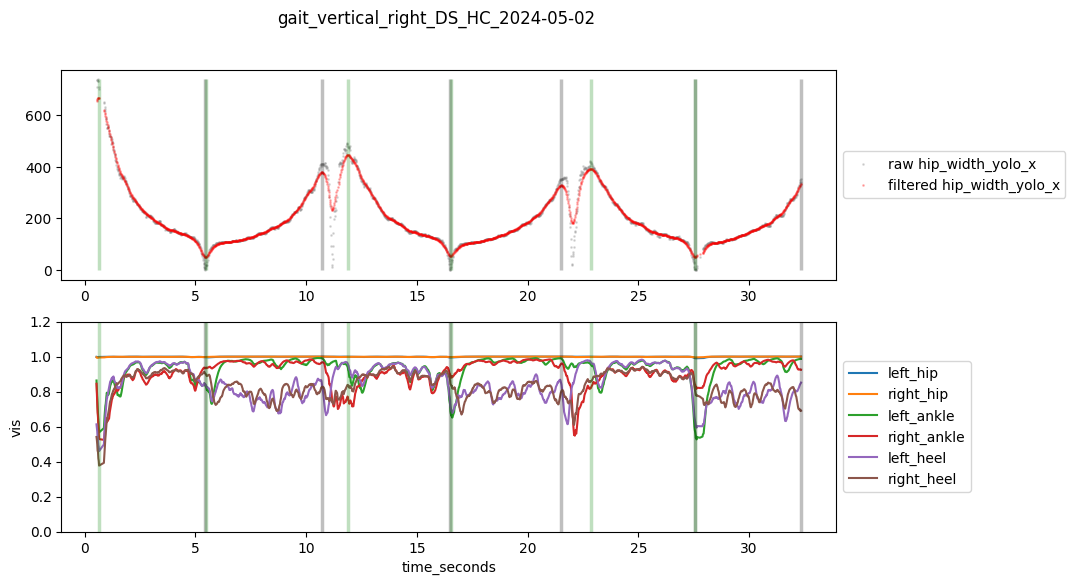

Skipped: no files matching gait_vertical_right_2
Skipped: no files matching gait_vertical_right_3
Skipped: no files matching gait_vertical_PWS_1
Skipped: no files matching gait_vertical_PWS_2
Skipped: no files matching gait_vertical_FW_1
Skipped: no files matching gait_vertical_FW_2
Skipped: no files matching gait_vertical_TUG_1
Skipped: no files matching gait_vertical_TUG_2
Analyzing data from: MM_HC\2024-07-30
dir_out_prefix: C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_hc_outputs\MM_HC\2024-07-30
Skipped: no files matching gait_vertical_left
Skipped: no files matching gait_vertical_left_2
Skipped: no files matching gait_vertical_left_3
Analyzing video_id_date_name: MM_HC_17ft_gait_vertical_right_MM_HC_2024-07-30


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


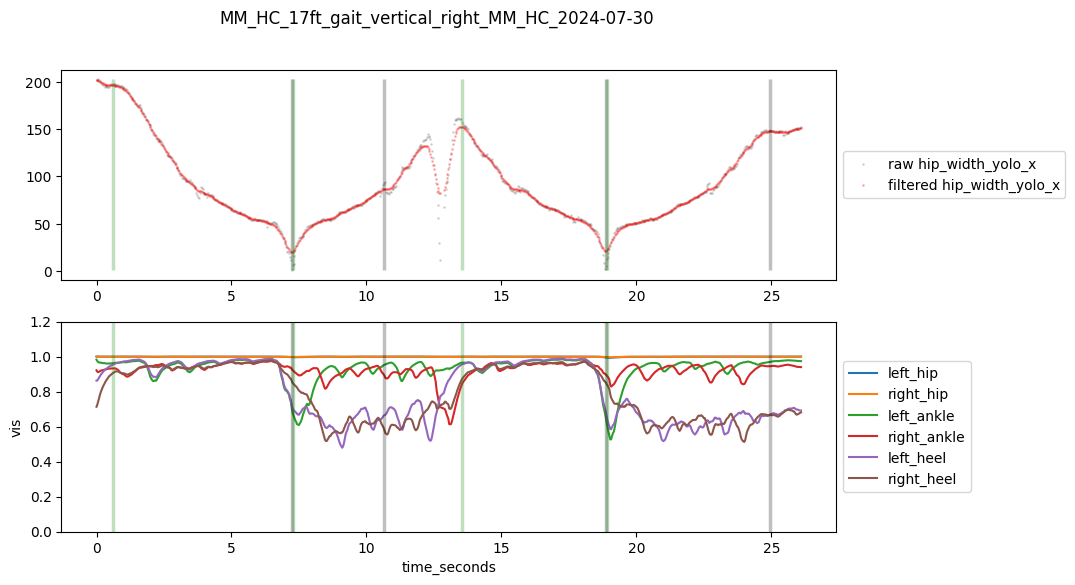

Skipped: no files matching gait_vertical_right_2
Skipped: no files matching gait_vertical_right_3
Skipped: no files matching gait_vertical_PWS_1
Skipped: no files matching gait_vertical_PWS_2
Skipped: no files matching gait_vertical_FW_1
Skipped: no files matching gait_vertical_FW_2
Skipped: no files matching gait_vertical_TUG_1
Skipped: no files matching gait_vertical_TUG_2
Analyzing data from: NW_HC\2024-05-02
dir_out_prefix: C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_hc_outputs\NW_HC\2024-05-02
Analyzing video_id_date_name: gait_vertical_left_NW_HC_2024-05-02


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


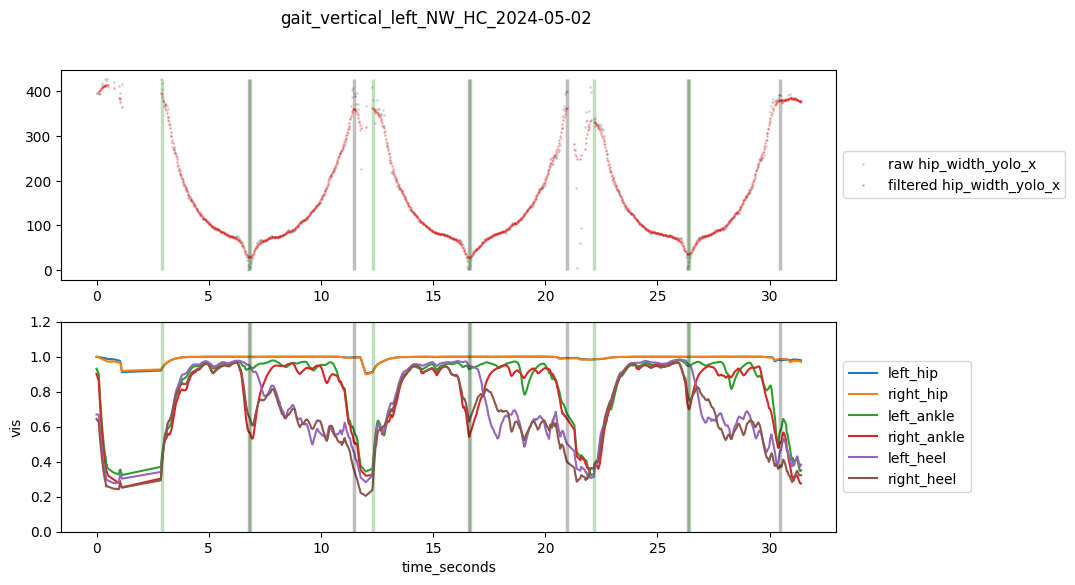

Skipped: no files matching gait_vertical_left_2
Skipped: no files matching gait_vertical_left_3
Analyzing video_id_date_name: gait_vertical_right_NW_HC_2024-05-02


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


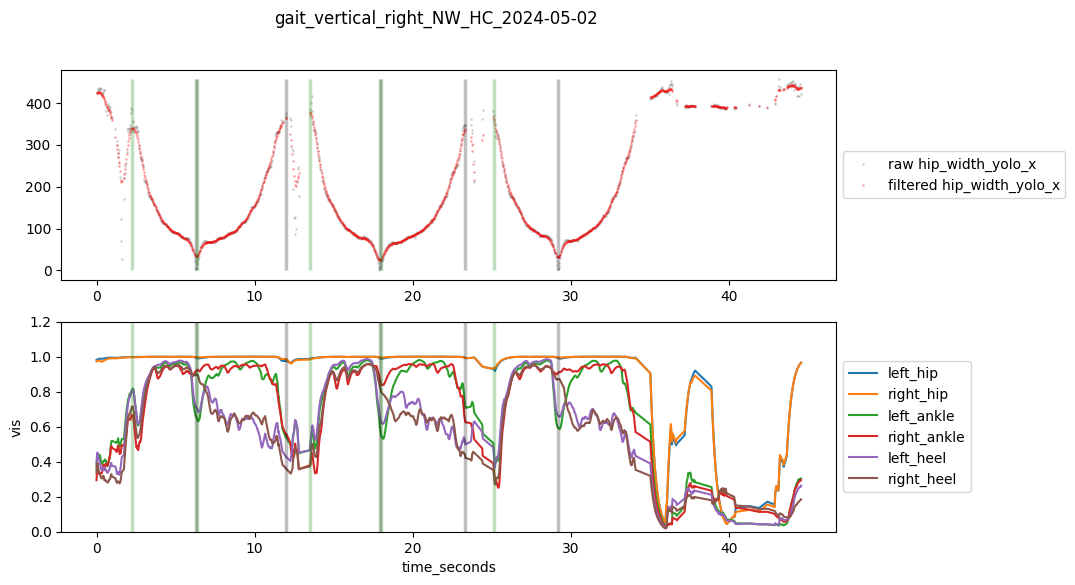

Skipped: no files matching gait_vertical_right_2
Skipped: no files matching gait_vertical_right_3
Skipped: no files matching gait_vertical_PWS_1
Skipped: no files matching gait_vertical_PWS_2
Skipped: no files matching gait_vertical_FW_1
Skipped: no files matching gait_vertical_FW_2
Skipped: no files matching gait_vertical_TUG_1
Skipped: no files matching gait_vertical_TUG_2
Analyzing data from: RB_HC\2024-05-02
dir_out_prefix: C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_hc_outputs\RB_HC\2024-05-02
Analyzing video_id_date_name: gait_vertical_left_RB_HC_2024-05-02


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


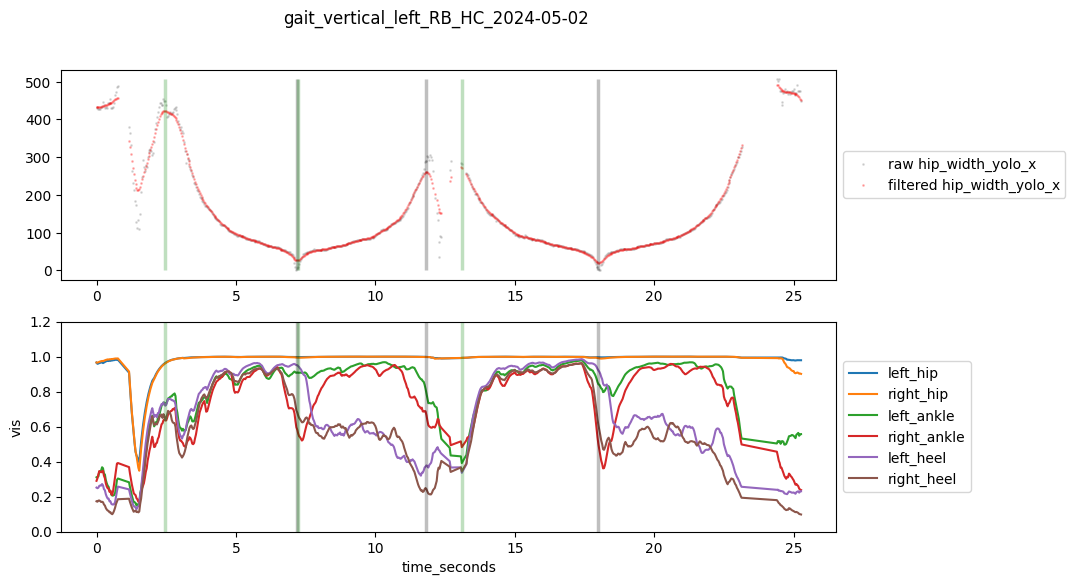

Skipped: no files matching gait_vertical_left_2
Skipped: no files matching gait_vertical_left_3
Analyzing video_id_date_name: gait_vertical_right_RB_HC_2024-05-02


C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\hva_code\HomeVideoAnalysis\megan_sandbox\raw_pose_analysis_funs\select_linear_walking.py:49: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_filled = yolo_long['hip_x_width_yolo'].fillna(0)


include: valid segments found


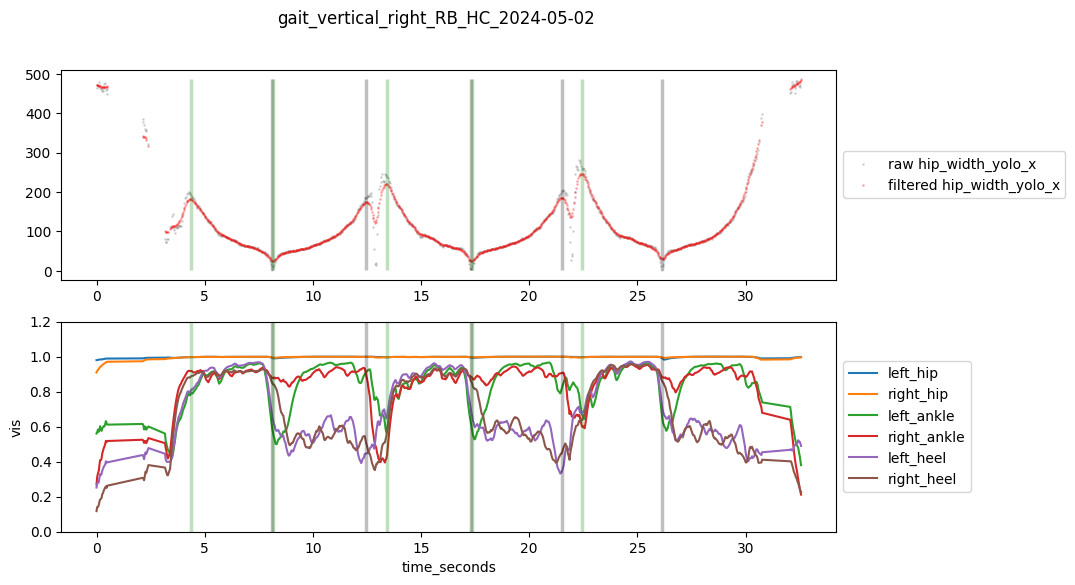

Skipped: no files matching gait_vertical_right_2
Skipped: no files matching gait_vertical_right_3
Skipped: no files matching gait_vertical_PWS_1
Skipped: no files matching gait_vertical_PWS_2
Skipped: no files matching gait_vertical_FW_1
Skipped: no files matching gait_vertical_FW_2
Skipped: no files matching gait_vertical_TUG_1
Skipped: no files matching gait_vertical_TUG_2


In [7]:
# for each unique ID and date combo, 
#select either all gait_vertical_right .csv files or all gait_vertical_left files and run all analysis 

# all unique ID and date combos of .csv files in raw pose data folder 
unique_id_date = list(set(id_date_all))
unique_id_date = sorted(unique_id_date) # run in same order every time

# gait_vertical_left and gait_vertical_right = home videos 
# PWS, FW, and TUG = in person BW zeno videos 
tasks = ['gait_vertical_left', 
         'gait_vertical_left_2', 
         'gait_vertical_left_3',
         'gait_vertical_right', 
         'gait_vertical_right_2',
         'gait_vertical_right_3',
         'gait_vertical_PWS_1',
         'gait_vertical_PWS_2',
         'gait_vertical_FW_1', 
         'gait_vertical_FW_2',
         'gait_vertical_TUG_1',
         'gait_vertical_TUG_2'
        ] 

# set blank variables to add file names to be included or excluded 
included_videos = []
excluded_videos = []

vids_support_not_calculated = []
vids_support_calculated = []

vids_insufficient_data = []

# blank to populate with all included participant metrics 
all_participants_pose_metrics_df = pd.DataFrame()

for id_date_i, id_date in enumerate(unique_id_date): 
    print('Analyzing data from: ' + id_date)
    # select raw data paths that match id_date combo 
    current_id_date_csv_file_paths = [item for item in raw_data_full_path_all if id_date in item]

    # set output folder prefix. Find relative paths relative from input folder to raw data .csv 
    raw_data_relpath = os.path.relpath(current_id_date_csv_file_paths[0], raw_pose_data_in_path)
    rel_path_to_date_subfolder, raw_data_subfolder = os.path.split(os.path.dirname(raw_data_relpath))
    dir_out_prefix = os.path.normpath(os.path.join(raw_pose_data_in_path, rel_path_to_date_subfolder))
    print('dir_out_prefix: ' + dir_out_prefix)
    
    # select raw data paths that match right or left vertical task/video
    for task_i, task, in enumerate(tasks):  
        # select files matching current task 
        current_task_csv_paths = [item for item in current_id_date_csv_file_paths if task in item]

         # populate in later step 
        valid_segments_found = [] 
        
        # if files with raw data for this task is saved in subfolder, run analysis  
        if len(current_task_csv_paths) == 0: 
            print('Skipped: no files matching ' + task)
        elif (len(current_task_csv_paths) > 0) & (len(current_task_csv_paths) <= 3):
            print('Skipped: missing required files to run gait analysis')
            vids_insufficient_data.append(current_task_csv_paths[0]) # often some videos with fps but not pose data 
        else:   
            # after selecting for correct task, save each raw data path as own variable 
            current_yolo_data_path = [item for item in current_task_csv_paths if 'yolo.csv' in item]
            current_mp_pose_data_path = [item for item in current_task_csv_paths if 'mediapipe.csv' in item]
            current_mp_world_data_path = [item for item in current_task_csv_paths if 'mediapipe_world.csv' in item]
            current_video_fps_path = [item for item in current_task_csv_paths if 'fps.csv' in item]

            # # [-1]: if more than 1 'gait_vertical_right' video, 
                # make sure to select 'gait_vertical_right' (last path), not 'gait_vertical_right_2' 
            if len(current_yolo_data_path) > 1: 
                current_yolo_data_path = [sorted(current_yolo_data_path)[-1]]
            if len(current_mp_pose_data_path) > 1:
                current_mp_pose_data_path = [sorted(current_mp_pose_data_path)[-1]]
            if len(current_mp_world_data_path) > 1:
                current_mp_world_data_path = [sorted(current_mp_world_data_path)[-1]]
            if len(current_video_fps_path) > 1:
                current_video_fps_path = [sorted(current_video_fps_path)[-1]]
            
            # read in raw pose data, all three types 
            mp_pose_df = pd.read_csv(current_mp_pose_data_path[0])
            mp_world_df = pd.read_csv(current_mp_world_data_path[0])
            yolo_df = pd.read_csv(current_yolo_data_path[0])
            
            # read in frames per seconds and save as var for future code 
            fps_df = pd.read_csv(current_video_fps_path[0], index_col = 0)
            fps = fps_df.iloc[0,0]

            # set video ID - ID_date_task (analogous to vid_in_path in run script, use for plot and file names)
            yolo_basename = os.path.splitext(os.path.basename(current_yolo_data_path[0]))[0]
            video_id_date_name = (yolo_basename).replace('yolo', id_date).replace('\\', '_')
            print('Analyzing video_id_date_name: ' + video_id_date_name)
        
            # run analysis functions 
            # step 001 - save updated .csv files in 001 output folder 
            [mp_all_df, yolo_df] = merge_mp_pose_world(mp_pose_df, mp_world_df, yolo_df)
            [mp_all_df, yolo_df] = clean_mp_yolo_missing_data(mp_all_df, yolo_df)
            [mp_all_df, yolo_df] = add_orientation_and_turn_direction(video_id_date_name, mp_all_df, yolo_df) # check vid_in_path 
            save_merge_mp_yolo_df(mp_all_df, yolo_df, video_id_date_name, dir_out_prefix)

            # 002 frames to time: save .csv file with seconds in 003 output folder 
            [mp_all_df, yolo_df] = add_time_column(mp_all_df, yolo_df, fps)
            save_df_w_time(mp_all_df, yolo_df, video_id_date_name, dir_out_prefix)

            # 003 - plot and save landmark visibility scores for yolo and mediapipe 
            # yolo 
            yolo_vis_lineplot(yolo_df, video_id_date_name, dir_out_prefix)
            # mediapipe 
            mp_vis_all_labels_boxplot(mp_all_df, video_id_date_name, dir_out_prefix) 
            mp_vis_lineplot(mp_all_df, video_id_date_name, dir_out_prefix)
            # calculate and save mean, standard deviation, and median visibility for each marker
            vis_stats_df = mp_save_vis_stats_by_label(mp_all_df, video_id_date_name, dir_out_prefix)

            # -------------------------------------
            # 3.5 test selecting linear walking, remove extraneous activity 
            valid_segments_all, valid_segments_found = select_plot_linear_walking(mp_all_df, yolo_df, fps, video_id_date_name, dir_out_prefix)
            
            # if not valid segments found, skip analysis steps and save name to exclude list 
            if valid_segments_found == 0: 
                excluded_videos.append(video_id_date_name) 
            else: # a valid segments are found, calculate metrics over each segment 
                included_videos.append(video_id_date_name)

                #005 calculate gait metrics over each walk segment 
                stride_time_stats_per_walk = pd.DataFrame()
                stride_times_all = pd.DataFrame()

                cadence_per_walk = pd.DataFrame()

                stride_width_stats_per_walk = pd.DataFrame()
                stride_width_all = pd.DataFrame()

                support_for_any_segments = []
                support_metrics_per_walk = pd.DataFrame()

                for segment_i, current_segment in enumerate(valid_segments_all):
                    start_sec = current_segment['time_seconds'].iloc[0]
                    end_sec = current_segment['time_seconds'].iloc[-1]
                    
                    # select yolo and mediapipe df between end and start seconds 
                    current_mp_all_df = mp_all_df[(mp_all_df['time_seconds'] >= start_sec) & (mp_all_df['time_seconds'] <= end_sec)]
                    current_segment_yolo_df = yolo_df[(yolo_df['time_seconds'] >= start_sec) & (yolo_df['time_seconds'] <= end_sec)]
            
                    #stride time ------------------------------
                    mp_ankle_Y_interp = stride_time_interp(current_mp_all_df, video_id_date_name, dir_out_prefix, max_gap, fps)
                    [stride_time_stats_df, stride_times_peaks, stride_times_valleys] = calculate_stride_time(mp_ankle_Y_interp, fps,
                                                                                                     video_id_date_name, dir_out_prefix,
                                                                                                     rolling_mean_window = round(.5 * fps), 
                                                                                                     find_peaks_distance = round(.33 * fps), # min distance between ankle y distance peaks (frames) 
                                                                                                     find_peaks_prominence = 0.01, # ankle y peaks need to be greater than this value to count as step
                                                                                                     walk_num = str(segment_i))
                    # save stride time stats per walking segment 
                    stride_time_stats_per_walk = pd.concat([stride_time_stats_per_walk, stride_time_stats_df])
                    
                    # join times from peaks and valleys 
                    peak_and_valley_times = pd.concat([pd.DataFrame(stride_times_peaks), pd.DataFrame(stride_times_valleys)]) # all times for one walk
                    stride_times_all = pd.concat([stride_times_all, peak_and_valley_times])

                    # cadence --------------------------------------
                    total_steps, video_length_sec, cadence_df = calculate_cadence(stride_times_peaks, stride_times_valleys,
                                                                                    start_sec, end_sec,
                                                                                    video_id_date_name, dir_out_prefix)
                    # save cadence for each segment 
                    cadence_per_walk = pd.concat([cadence_per_walk, cadence_df])

                    # stride width ---------------------------------
                    mp_stride_width_interp_dfs = stride_width_interp(current_mp_all_df, video_id_date_name, dir_out_prefix, max_gap, fps)
                    stride_width_stats_df, stride_width = calculate_stride_width(mp_stride_width_interp_dfs, 
                                                                                 video_id_date_name, 
                                                                                 dir_out_prefix, 
                                                                                 walk_num = str(segment_i))
                    # save stride width stats per walking segment 
                    stride_width_stats_per_walk = pd.concat([stride_width_stats_per_walk, stride_width_stats_df])
                    
                    # save stride widths for all segments 
                    stride_width_all = pd.concat([stride_width_all, stride_width])

                    # single and double support - only on segments walking away 
                    if (current_segment['pattern'] == 'decreasing').all():

                        # select and interpolate ankle y data 
                        yolo_support_interp_dfs = support_interp(current_segment_yolo_df, video_id_date_name, dir_out_prefix, max_gap, fps)
                        right_ankle_y = yolo_support_interp_dfs[0]
                        left_ankle_y = yolo_support_interp_dfs[1]

                        # find peaks and min of velocity and acceleration 
                        right_ank_y_data = ankle_y_vel_accel_peak_min(right_ankle_y,
                                                                      diff_period = round(.167 * fps),  # frames to take diff between for vel + accel
                                                                      peaks_distance = round(.167 * fps), # min distance between peaks + valleys 
                                                                      peaks_prominence_percent_max = .05, # percent of biggest peak that each peak must be greater than to be identified 
                                                                      valleys_prominence_percent_max = .10) # percent of biggest peak that each valley must be greater than to be identified 
                        
                        left_ank_y_data = ankle_y_vel_accel_peak_min(left_ankle_y, 
                                                                     diff_period = round(.167 * fps),  # frames to take diff between for vel + accel
                                                                     peaks_distance = round(.167 * fps), # min distance between peaks + valleys
                                                                     peaks_prominence_percent_max = .05, 
                                                                     valleys_prominence_percent_max = .10)
                        
                        # get gait events from position, velocity, and acceleration data
                        toe_off_heel_strike_df, enough_data_for_support = id_toe_off_heel_strike(right_ank_y_data, 
                                                                        left_ank_y_data, 
                                                                        video_id_date_name, 
                                                                        dir_out_prefix, 
                                                                        walk_num = str(segment_i))
 
                        support_for_any_segments.append(enough_data_for_support)
                        
                        if enough_data_for_support == 1: 
                            # calculate single and double support from toe off and heel strike frames 
                            support_metrics_df = calculate_single_double_support(toe_off_heel_strike_df, fps, video_id_date_name, dir_out_prefix, segment_i)
                            # one row = one walk segment 
                            support_metrics_per_walk = pd.concat([support_metrics_per_walk, support_metrics_df])
                
                # ----------------------------------------------------------------
                # save results for each walking segment and for all walking segments combined 
                vid_in_path_no_ext = os.path.splitext(os.path.basename(video_id_date_name))[0]
                
                # stride time  
                # each row = 1 walk segment 
                stride_time_output = os.path.join(dir_out_prefix, '005_gait_metrics', 'stride_time')
                stride_time_stats_path = os.path.normpath(os.path.join(stride_time_output, (vid_in_path_no_ext + '_stride_time_stats_per_walk.csv')))
                stride_time_stats_per_walk.to_csv(stride_time_stats_path)

                # save stride time summary stats for all strides in all walking segments 
                stride_time_stats_all = pd.DataFrame(data = {'stride_time_mean_sec' : [stride_times_all['seconds'].mean(skipna = True)], 
                                                             'stride_time_median_sec': [stride_times_all['seconds'].median(skipna = True)], 
                                                             'stride_time_std' : [stride_times_all['seconds'].std(skipna = True)], 
                                                             'stride_time_cv' : [(stride_times_all['seconds'].std(skipna = True) / 
                                                                                   stride_times_all['seconds'].mean(skipna = True)) * 100],
                                                             'stride_time_max' : [stride_times_all['seconds'].max(skipna = True)],
                                                             'stride_time_min' : [stride_times_all['seconds'].min(skipna = True)]
                                                            })
                stride_time_all_stats_path = os.path.normpath(os.path.join(stride_time_output, (vid_in_path_no_ext + '_stride_time_stats_all.csv')))
                stride_time_stats_all.to_csv(stride_time_all_stats_path)

                # cadence 
                cadence_output_folder = os.path.join(dir_out_prefix, '005_gait_metrics', 'cadence')
                if not os.path.exists(cadence_output_folder):
                    os.makedirs(cadence_output_folder)
                
                # each row = cadence from 1 walk  
                cadence_per_walk_path = os.path.normpath(os.path.join(cadence_output_folder, (vid_in_path_no_ext + '_cadence_per_walk.csv')))
                cadence_per_walk.to_csv(cadence_per_walk_path)

                # mean of cadence from all walk segments 
                cadence_mean_df = pd.DataFrame(index = range(1), 
                                               data = {'mean_cadence_step_per_min' : cadence_per_walk['cadence_step_per_min'].mean(skipna = True)})
                cadence_mean_path = os.path.normpath(os.path.join(cadence_output_folder, (vid_in_path_no_ext + '_mean_cadence.csv')))
                cadence_mean_df.to_csv(cadence_mean_path)

                # stride width 
                width_output_folder = os.path.join(dir_out_prefix, '005_gait_metrics', 'stride_width')
                if not os.path.exists(width_output_folder):
                    os.makedirs(width_output_folder)

                # save stats = each row = 1 walk 
                stride_width_stats_path = os.path.normpath(os.path.join(width_output_folder, (vid_in_path_no_ext + '_stride_width_stats_per_walk.csv')))
                stride_width_stats_per_walk.to_csv(stride_width_stats_path)

                # stats across all walks 
                stride_width_stats_all = pd.DataFrame(data = {'stride_width_mean_cm' : [stride_width_all['heel_x_diff_0'].mean(skipna = True)],
                                                              'stride_width_median_cm' : [stride_width_all['heel_x_diff_0'].median(skipna = True)],
                                                              'stride_width_std' : [stride_width_all['heel_x_diff_0'].std(skipna = True)], 
                                                              'stride_width_cv' : [(stride_width_all['heel_x_diff_0'].std(skipna = True) / 
                                                                                    stride_width_all['heel_x_diff_0'].mean(skipna = True)) * 100],
                                                              'stride_width_max' : [stride_width_all['heel_x_diff_0'].max(skipna = True)],
                                                              'stride_width_min' : [stride_width_all['heel_x_diff_0'].min(skipna = True)]
                                                              })
                
                stride_width_all_stats_path = os.path.normpath(os.path.join(width_output_folder, (vid_in_path_no_ext + '_stride_width_stats_all.csv')))
                stride_width_stats_all.to_csv(stride_width_all_stats_path)

                # double + single support  
                #if all values = 0 --> wasn't able to calculate support for any walking segments 
                if sum(support_for_any_segments) == 0: 
                    vids_support_not_calculated.append(video_id_date_name)
                    support_metrics_all = create_blank_df_for_no_support()
                    

                else: # metrics were calculated 
                    vids_support_calculated.append(video_id_date_name)
                    
                    support_output_folder = os.path.join(dir_out_prefix, '005_gait_metrics', 'support')
                    if not os.path.exists(support_output_folder):
                        os.makedirs(support_output_folder)

                    # one row per walk 
                    support_metrics_per_walk_path = os.path.normpath(os.path.join(support_output_folder, (vid_in_path_no_ext + '_support_metrics_per_walk.csv')))
                    support_metrics_per_walk.to_csv(support_metrics_per_walk_path)

                    # mean of each row 
                    support_metrics_all = pd.DataFrame(support_metrics_per_walk.mean(numeric_only = True)).transpose()
                    support_metrics_all.columns = [f"{col}_mean" for col in support_metrics_all.columns]
                    support_metrics_all['walk_segment'] = support_metrics_per_walk['walk_segment'].iloc[0]
                    support_metrics_all['foot1'] = support_metrics_per_walk['foot1'].iloc[0]
                    support_metrics_all_path =  os.path.normpath(os.path.join(support_output_folder, (vid_in_path_no_ext + '_support_metrics_all_mean.csv')))
                    support_metrics_all.to_csv(support_metrics_all_path)
                    
        # if valid segments found, compile all metrics stats for one participant into one .csv and save for all participants df 
        if valid_segments_found == 1:
            pose_metrics_df = save_all_pose_metrics(id_date, video_id_date_name, task,
                                                    stride_time_stats_all, 
                                                    cadence_mean_df, 
                                                    stride_time_stats_df, 
                                                    stride_width_stats_all,
                                                    support_metrics_all,
                                                    dir_out_prefix)

            all_participants_pose_metrics_df = pd.concat([all_participants_pose_metrics_df, pose_metrics_df])


In [8]:
# summary of all participants ----------------------------------------------------------------------
raw_parent, all_gait_metrics_filename = os.path.split(raw_pose_data_in_path)
all_participants_pose_metrics_df.to_csv(os.path.join(raw_pose_data_in_path, (all_gait_metrics_filename + '_pose_metrics_all.csv')))
print("Saving pose_metrics_all.csv")

# save file on included vs excluded walks 
excluded_videos_df = pd.DataFrame(data = {'excluded_vids' : excluded_videos})
excluded_videos_df.to_csv(os.path.join(raw_pose_data_in_path, (all_gait_metrics_filename + '_excluded_videos.csv')))

included_videos_df = pd.DataFrame(data = {'included_vids' : included_videos})
included_videos_df.to_csv(os.path.join(raw_pose_data_in_path, (all_gait_metrics_filename + '_included_videos.csv')))

# save file with videos for which double support could and couldn't be calculated 
vids_support_calculated_df = pd.DataFrame(data = {'vids_support_calculated' : vids_support_calculated})
vids_support_calculated_df.to_csv(os.path.join(raw_pose_data_in_path, (all_gait_metrics_filename + '_support_calculated.csv')))


vids_support_not_calculated_df = pd.DataFrame(data = {'vids_support_not_calculated' : vids_support_not_calculated})
vids_support_not_calculated_df.to_csv(os.path.join(raw_pose_data_in_path, (all_gait_metrics_filename + '_support_not_calculated.csv')))

# save list of videos without enough .csv input files for analysis (often have fps but missing pose data) 
vids_insufficient_data_df = pd.DataFrame(data = {'vids_insufficient_data' : vids_insufficient_data})
vids_insufficient_data_df.to_csv(os.path.join(raw_pose_data_in_path, (all_gait_metrics_filename + '_insufficient_data_for_gait_analysis.csv')))

Saving pose_metrics_all.csv


In [13]:
print('number of vids_insufficient_data_df')
print(len(vids_insufficient_data_df))

print('number of excluded_videos_df')
print(len(excluded_videos_df))

print('number of included_videos_df')
print(len(included_videos_df))

print('number of vids_support_calculated_df')
print(len(vids_support_calculated_df))


number of vids_insufficient_data_df
0
number of excluded_videos_df
0
number of included_videos_df
7
number of vids_support_calculated_df
7
